# Applying Unsupervised Learning
# In Customer Market Segmentation
## By Yosry Negm

<br><hr><br>
In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

The code below loads the wholesale customers dataset, along with a few of the necessary Python libraries required for this project.

In [1]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")   

import warnings
warnings.filterwarnings('ignore')

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, I will begin exploring the data through visualizations and code to understand how each feature is related to the others. we will observe a statistical description of the dataset, considering the relevance of each feature, and selecting a few sample data points from the dataset which we will track through this project.

The code below is to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, I will add **three** indices of my choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until we obtain customers that vary significantly from one another.

In [3]:
# Select three indices of our choice you wish to sample from the dataset
indices = [138,209,377] # After trying several time randomly, using np.random.choice(440,3) to get significant varied three.

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13537,4257,5034,155,249,3271
1,5550,12729,16767,864,12420,797
2,38793,3154,2648,1034,96,1242


Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers we may ask the questions :  

* What kind of establishment (customer) could each of the three samples We've chosen represent?

Thinking of  Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. We can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do our samples compare? Does that help in driving our insight into what kind of establishments they might be? 

By inspecting the above result of the selected three customers we could analyze the data as follows :-

## First selected customer (No. 0 index 138):-
- <b>Fresh:</b> <u>Slightly</u> above the average (<font color='green'><b> + </b></font>)
- <b>Milk:</b> <u>Slightly</u> below the average (<font color='red'><b> - </b></font>)
- <b>Grocery:</b> <u>Notably</u> above the average (<font color='green'><b> + + </b></font>) 
- <b>Frozen:</b> <font color='red'><b>Little</b></font>
- <b>Detergents Papers:</b> <u>Notably</u> below the average (<font color='red'><b> - - </b></font>) 
- <b>Delicatessen:</b> <u>Notably</u> above the average (<font color='green'><b> + + </b></font>) <br>
as we notice from the above look at the first selected customer total purchase cost breakdown ,it looks like that higher than the average goes in purchasing fresh foods ,grocery items and delicatessen so, we have items like vegtables,fruit ,meat .. etc. and it also gives the indication that the food is prepared freshly.Hence it suggests that this estibleshment may be a<b><font color='blue'> Resturant</font></b>.
## Second selected customer (No. 1 index 209):-
- <b>Fresh:</b> <u>Notably</u> below the average (<font color='red'><b> - - </b></font>)
- <b>Milk:</b> <u>Notably</u> above the average (<font color='green'><b> + + </b></font>)
- <b>Grocery:</b> <u>Notably</u> above the average (<font color='green'><b> + + </b></font>) 
- <b>Frozen:</b> <font color='green'><b>Slightly moderate</b></font>
- <b>Detergents Papers:</b> <u>Notably</u> above the average (<font color='green'><b> + + </b></font>) 
- <b>Delicatessen:</b> <u>Slightly</u> below the average (<font color='red'><b> - </b></font>) <br>
as we notice from the above look at the second selected customer total purchase cost breakdown ,it looks like that higher than the average goes in purchasing grocery items,Milk and detergents papers so, it suggests that this estibleshment may be a<b><font color='blue'> Supermarket</font></b> , Grocery shop or small retailer.
## Third selected customer (No. 2 index 377):-
- <b>Fresh:</b> <u>Exteremely</u> above the average (<font color='green'><b> + + + </b></font>)
- <b>Milk:</b> <u>Notably</u> below the average (<font color='red'><b> - - </b></font>)
- <b>Grocery:</b> <u>Notably</u> below the average (<font color='red'><b> - - </b></font>) 
- <b>Frozen:</b> <font color='green'><b>More</b></font>
- <b>Detergents Papers:</b> <u>Exteremely</u> below the average (<font color='red'><b> - - - </b></font>) 
- <b>Delicatessen:</b> <u>Slightly</u> near the average (<font color='red'><b> - </b></font>) <br>
as we notice from the above look at the third selected customer total purchase cost breakdown ,it looks like that higher than the average goes exteremly in purchasing fresh foods such as vegtables,greens,fruits,....etc. Hence, it suggests that this estibleshment may be a<b><font color='blue'> Farmers's Market</font></b>.

### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, we will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1, inplace = False)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'],test_size=0.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print("Score:",score)

Score: 0.7286551812541454


In the above code :-
- I've  selected the feature named <b><font color='green'>( Detergents_Paper )</font></b> in attemp to predict
- The reported prediction score was <b><font color='green'>( 72.9 % )</font></b>
- Because of that the prediction score is some how high or<b> considerable</b>. Hence, other features may correlate well with our chosen feature <b><font color='green'>(Detergents_Paper )</font></b> i.e. we could conclude that it does not provide more information gain and it is<b><font color='red'> less important and not necessary</font></b> for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If we found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. The code block below to produce a scatter matrix.

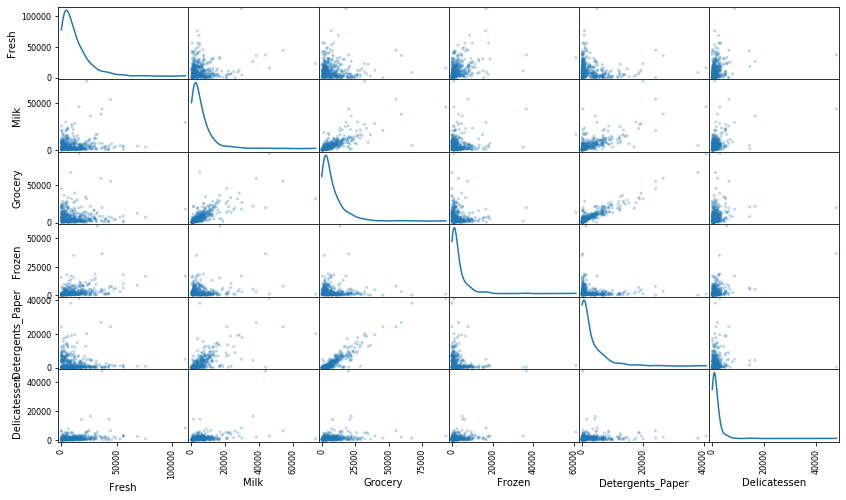

In [5]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

We are using the scatter matrix as a reference for discussing the distribution of the dataset, specifically talking about the normality, outliers, large number of data points near 0 among others. If we need to sepearate out some of the plots individually to further accentuate our point, we may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny our suspicions about the relevance of the feature we attempted to predict? 
* How is the data for those features distributed?

We may ask, Is the data normally distributed? Where do most of the data points lie? We can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

# Heat map and Pair plot

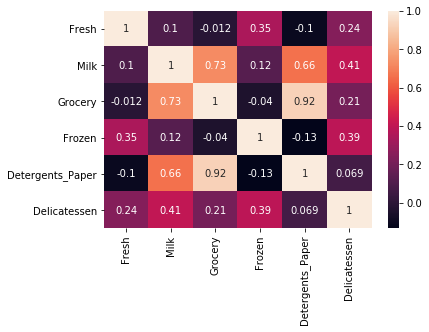

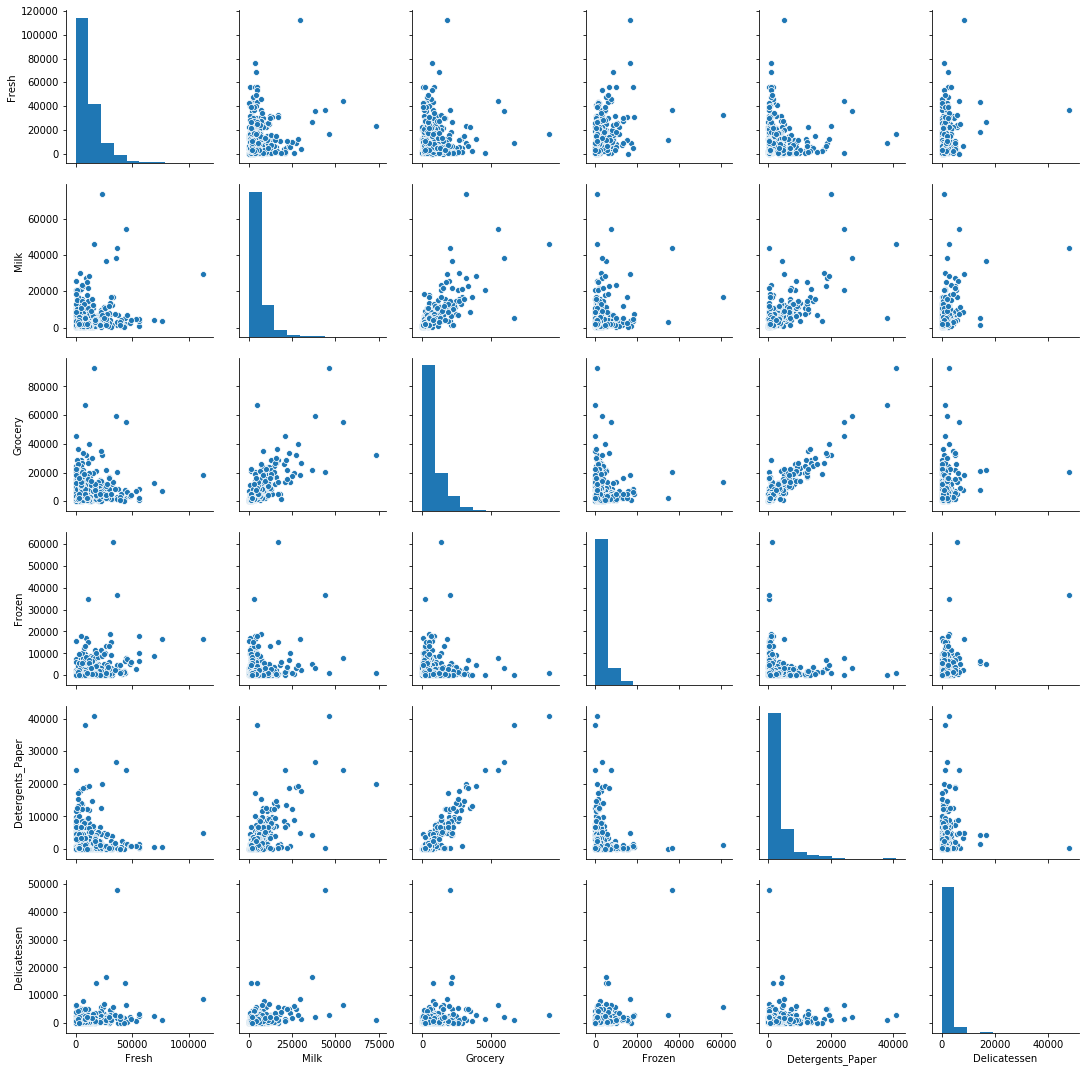

In [6]:
import seaborn as sss
sss.heatmap(data.corr(), annot=True)
sss.pairplot(data);

By examining the above scatter matrix and the constructed heat map and pair plot for all of the features involved. We may get some clear insights over the underlying dataset as follows:-
- Detergents Paper and Grocery are strongly correlated linearly.
- Detergents Paper and Milk also,correlated linearly but in less degree.
- Grocery and Milk are in linear correlation with similar degree.
from the above clearification we could find that<b><font color='green'> Detergents Paper</font></b> is less contributing to expressing the figure of customer's spending habits as per accompanied data under investigation<b><font color='green'><u> as I cocluded before</u></font></b> since it is notable that this feature is correlated to milk and grocery and therefore it will not give more information gain if it used.
- the data appear <b><font color='red'>not to have a normal distribution</font></b> but it looks like <u><b>skewed towards the origin</b></u> with <b><font color='green'>few outliers points</font></b> and in general it tends to be linear.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

The code block below, shows the following:
 - Assigning a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assigning a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

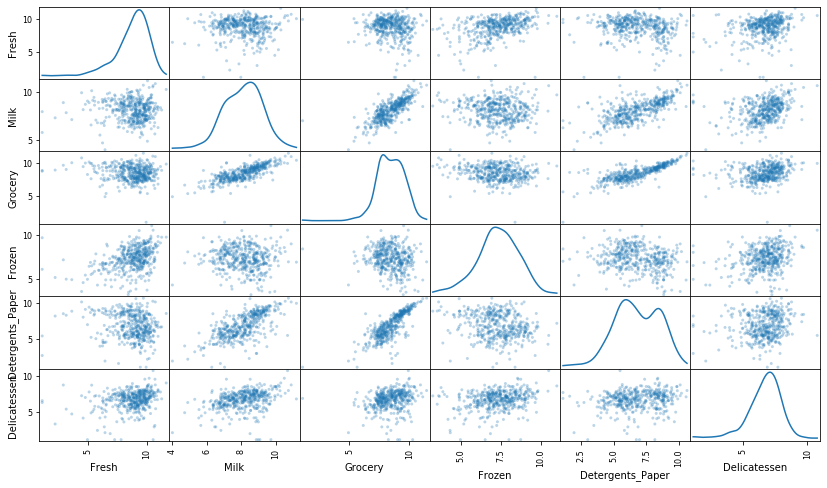

In [7]:
from pandas.plotting import scatter_matrix

# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

The code below shows how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.513182,8.356320,8.523970,5.043425,5.517453,8.092851
1,8.621553,9.451638,9.727168,6.761573,9.427063,6.680855
2,10.565995,8.056427,7.881560,6.941190,4.564348,7.124478


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, we will implement the following:
 - Assigning the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assigning the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assigning the calculation of an outlier step for the given feature to `step`.
 - Optionally removing data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If we choose to remove any outliers, we should ensure that the sample data does not contain any of these points!  
Once we have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # Display the outliers
    print("\nData points considered outliers for the feature '{}':\n".format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers += feature_outliers.index.tolist()
    #display(feature_outliers)
    print("{}:".format(feature_outliers))
# OPTIONAL: Select the indices for data points you wish to remove
   
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Number of outliers (including duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))


Data points considered outliers for the feature 'Fresh':

        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  

Based on the definition above, we may ask :
* Are there any data points considered outliers for more than one feature ? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, and why.

If we have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in our analysis of whether or not to remove them.

as we noticed above that there are many data points existed as outliers for more than one feature such as:- 

- 154: An outlier for Delicatessen, Milk and Grocery.
- 128: An outlier for Delicatessen and Fresh.
- 75: An outlier for Detergents_Paper and Grocery.
- 66: An outlier for Delicatessen and Fresh
- 65: An outlier for Frozen and Fresh

I think the reason behind these discovered outliers is the few points lies below below the IQR.And this which caused the mentioned outliers to be more deviating and making skewed data in multiple features. I think also,It will be good thing if we removed these outliers points from the overall data since They add no value to any predictive models, and would only skew the results. Because we hunt all thses outliers in a list,Using PCA algorithm could help removing them easily .

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Principal Component Analysis (PCA)

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will implement the following:
 - Importing `sklearn.decomposition.PCA` and assigning the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Applying a PCA transformation of `log_samples` using `pca.transform`, and assigning the results to `pca_samples`.

In [10]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

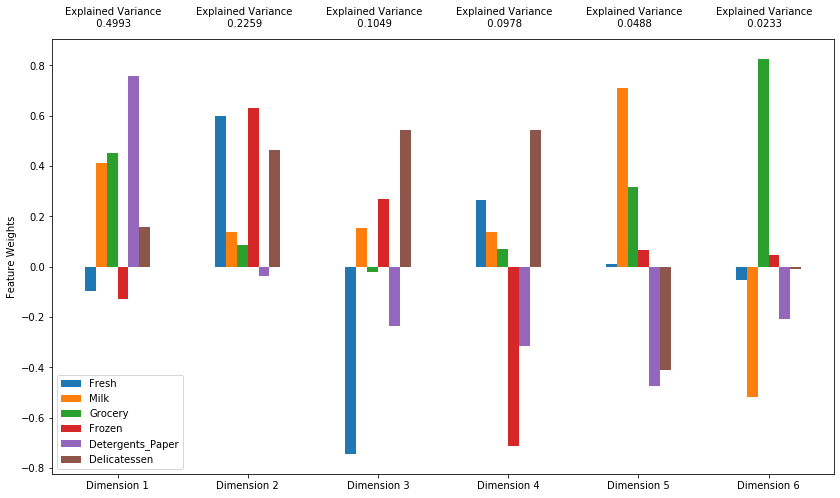

In [11]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = pca_results(good_data, pca)

From the above figure we note that each component contributes in customer's spending habits as follows :- 
- The First Two principal components shows up 72.5 % of the variance in the data ( 49.9 + 22.6 ).
- The First Four principal components shows up 92.8 % of the variance in the data ( 49.9 + 22.6 + 10.5 + 9.8 ).

- we also note that the  first PC is wide variety overall the features and most prominent.It may represent Detergents Paper ,it looks like giving information gain to Milk, Grocery and Delicatassen in some how.But it perform worsely to predict Fresh and Frozen and another component is needed.and this may serve big supermarkets category.
- We also note that second component works highly for Fresh and Frozen and supplements Delicatessen,However, It contributes with small gain for Milk ,Grocery and Detergents Paper.and this may serve hotels,resturants category.
- For the third component it works well for Fresh and Detergents Paper but less for the remaining features.It serves for small shops,groceries and retailers.
- The Fourth Component acts high for Frozen Detergents Paper but less for the rest.It may serve for big suppliers such as frozen food market suppliers.


### Observation
The code below shows how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with our initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.3677,-0.4671,-0.0361,3.0004,0.1148,0.0737
1,3.2386,-0.4693,-0.4522,-0.2300,0.1098,-0.1696
2,-2.0032,0.8522,-0.6485,1.6143,0.6879,-0.0626


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we will implement the following:
 - Assigning the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Applying a PCA transformation of `good_data` using `pca.transform`, and assigning the results to `reduced_data`.
 - Applying a PCA transformation of `log_samples` using `pca.transform`, and assigning the results to `pca_samples`.

In [13]:
def pca_results2(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


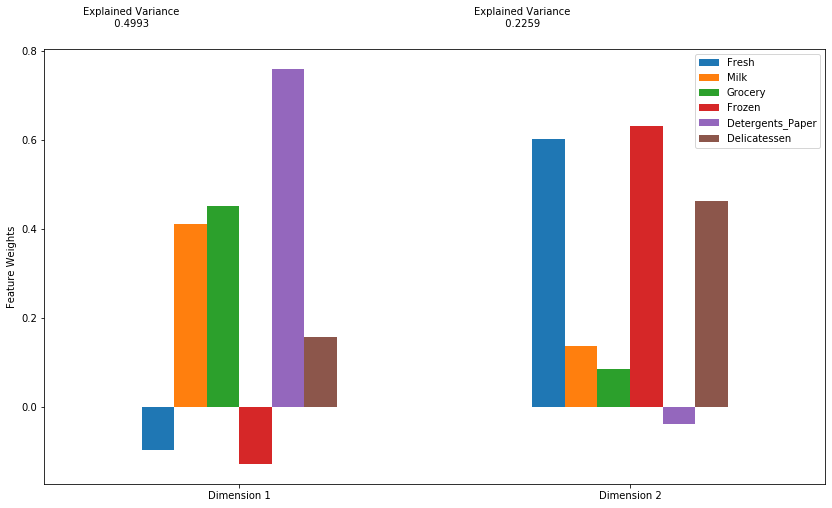

In [14]:
#import visuals as vs

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca_results2(good_data, pca)

### Observation
The code below shows how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.3677,-0.4671
1,3.2386,-0.4693
2,-2.0032,0.8522


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

The code below produces a biplot of the reduced-dimension data.

In [16]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

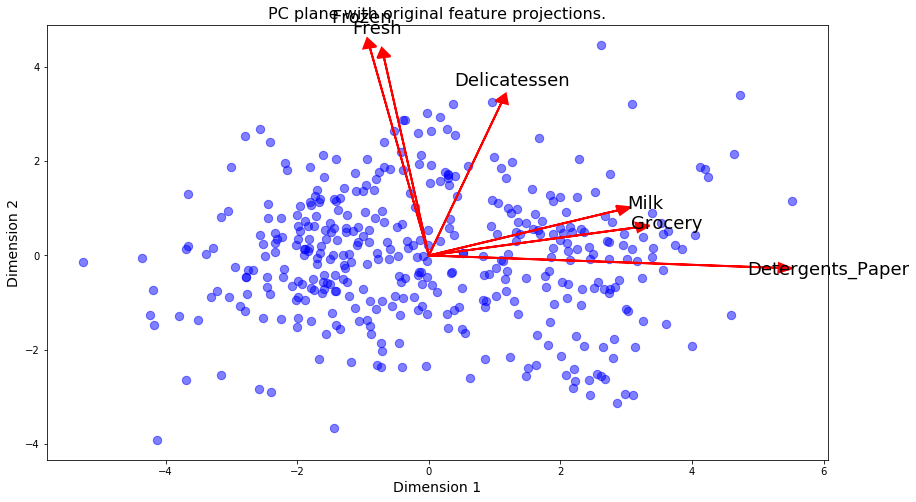

In [17]:
# Create a biplot
biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot we obtained earlier?

## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. we will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Advantages of K-means clustering algorithm;-
- Simple, easy to implement. 
- Has fewer parameters,so it is much faster.
- Easy to interpret the clustering results.
- Efficient in terms of computational cost.
- Suited for situations of large data,Also where clusters are easily seperable and non-uniform.

## Advantages of GMM algorithm;-
- More flexible in terms of cluster covariance.
- Data points do not necessarilly have to be assigned rigidly.
- Accommodates mixed membership
- Data points with lower probability could be assigned to multiple clusters at once.
- Able to assign non-spherical clusters.
- Can be used to predict probabilities of events rather than rigid features.

From the above scatter plot,we could see that  the data points appears to be some how uniform. many data points don't clearly belong to one particular cluster or another, so the best suggestion for our model is to use the<b><font color='green'>  Gaussian Mixture Model </font></b>algorithm.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, we will implement the following:
 - Fiting a clustering algorithm to the `reduced_data` and assigning it to `clusterer`.
 - Predicting the cluster for each data point in `reduced_data` using `clusterer.predict` and assigning them to `preds`.
 - Finding the cluster centers using the algorithm's respective attribute and assigning them to `centers`.
 - Predicting the cluster for each sample data point in `pca_samples` and assigning them `sample_preds`.
 - Importing `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assigning the silhouette score to `score` and print the result.

In [18]:

from sklearn.mixture import GaussianMixture as GMM

from sklearn.metrics import silhouette_score

def myGMM(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = myGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results) 

Number of Clusters,Silhouette Score
2,0.446754
3,0.352561
4,0.315138
5,0.313569
6,0.338435
7,0.249866
8,0.319922
9,0.343773
10,0.316840
11,0.330908


## Silhouette Scores of the Clusters :-

The silhouette score for several cluster numbers I tried is shown in the following table below :-

In [19]:
display(results) 

Number of Clusters,Silhouette Score
2,0.446754
3,0.352561
4,0.315138
5,0.313569
6,0.338435
7,0.249866
8,0.319922
9,0.343773
10,0.316840
11,0.330908


## Clusters that has the best silhouette score:-
the best silhouette score is achieved when using only 2 clusters.
- For 2 Clusters, Silhouette score = 0.443 ( <b><font color='green'>Best score </font></b>)
- For 3 Clusters, Silhouette score = 0.357
- For 4 Clusters, Silhouette score = 0.292
- For 5 Clusters, Silhouette score = 0.266
- and so on.

### Cluster Visualization
Once we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. Note that, for experimentation purposes, we are welcome to adjust the number of clusters for our clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [20]:
import matplotlib.cm as cm


def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


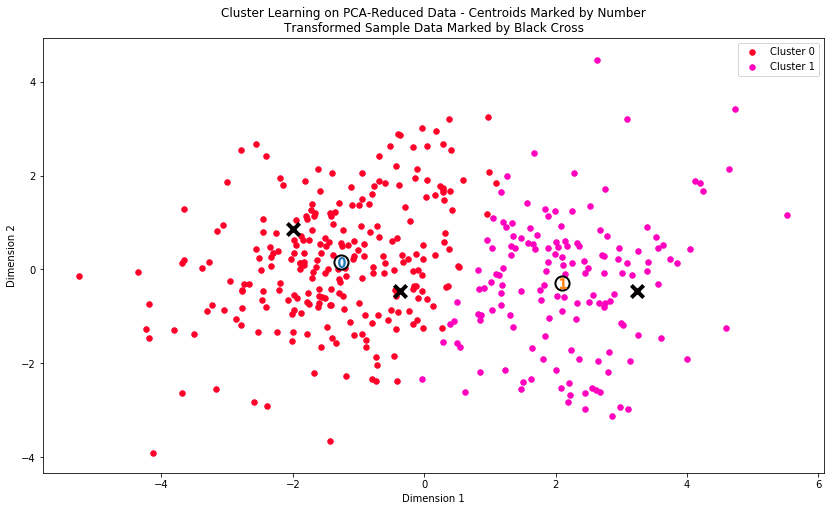

In [21]:
# Display the results of the clustering from implementation
myGMM(2)
cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, we will implement the following:
 - Applying the inverse transform to `centers` using `pca.inverse_transform` and assigning the new centers to `log_centers`.
 - Applying the inverse function of `np.log` to `log_centers` using `np.exp` and assigning the true centers to `true_centers`.

In [22]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


* Considering the total purchase cost of each product category for the representative data points above, and referencing the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). the set of establishments could each of the customer segments represent could be found as follows

**Note:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

First we construct a heat map and Axes Plots as helpers as follows:-

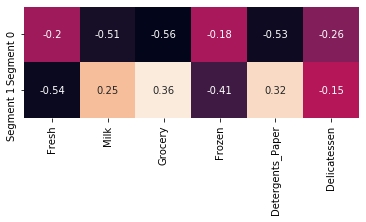

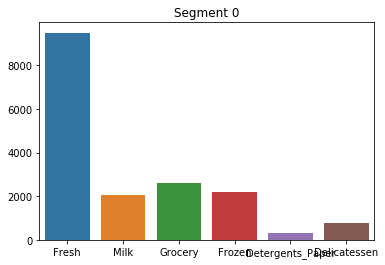

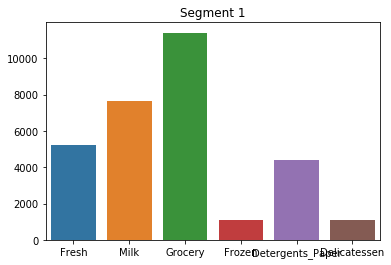

In [23]:
sss.heatmap((true_centers-data.mean())/data.std(ddof=0),square=True, annot=True, cbar=False)
plt.figure()
plt.axes().set_title("Segment 0")
sss.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sss.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

from the above illustrations we could conclude that:-
- <u>Cluster 0 (Segment 0)</u>:
 It looks like representing restaurants or hotels serving fresh food due to the strong weight upon the Fresh category. however, the bulk lies below the overall population average, it is matches my previous prediction for what a Restaurant might looks like in the Data Explotation section.
- <u>Cluster1 (Segment 1)</u>: has predominant quantities of Grocery items and Milk . The Milk and Grocery items in this cluster exceed the overall average observed in the Data Exploration section, which suggests the are bulk distributors or large resellers such as supermarkets or retailers.

If we ask questions like :

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

The code block below will find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


By inspecting the above result of the selected three customers we could analyze the data as follows :-
## First selected customer (No. 0 index 138):-
- My previous Guess: Restaurant because of Fresh Food,meat ,Milk.
- Model Prediction:  Restaurant .
- This agrees with my previous prediction. 

## Second selected customer (No. 1 index 209):-
- My previous Guess: Supermarket because of high usage of Groceries.
- Model Prediction:  Supermarket .
- This agrees with my previous prediction. 

## Third selected customer (No. 2 index 377):-
- My previous Guess: Farmers's Market because of Large amount of usage  Fresh Food.
- Model Prediction:  Restaurant .
- I missed here the right guess because I confused of the extereme volume of using Fresh and when revising again it looks like a rstaurant not farmer's market. 

From the above result we could say that our model works fine for accompanying data. The model seems to take valid logical interpretations.

## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* So if we want to know How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Our Model suggested  two main customer categories:-
- Cluster 0 : restaurants/Hotels /cafes ( Utilzes large amounts of fresh food ).
- Cluster 1 : supermarkets / bulk distributors  ( Utilzes many of different items ).
So, It looks like that customers from<font color='red'> Cluster 0</font> who serve lots of fresh food are going to want<font color='red'>Morening  5-days a week delivery method</font> in order to keep food as fresh as possible. 
but<font color='green'> Cluster 1</font> could be more <b>flexible </b>- they buy a more wide variety of perishable and non-perishable goods so do not necessarilly need a daily delivery and could be <font color='green'>evening 3 days a week delivery method</font>.hence, the Company could run A/B tests and generalize. By picking a subset customers from each Cluster, they can evaluate feedback seperately. It could be established whether changing the delivery service is critical to each segment, and whether customers are happy with the change.If a trend is found in a particular cluster, it allows a business to make educated and targeted decisions that would benefit their customers going forward depending on their profile. This is as opposed to which would generalize the entire customer-base.

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* Also, if we asked How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

A supervised learner could be used to train on the original customers. What would be the target variable?

The wolesale distributer can label the new customers as follows:-
- First running an unsupervised clustering approach, such as GMM, to setup clusters.
- Use this as a new feature - which cluster they are in. We can call this feature 'Customer Segment', and they could be assigned abritrary enumerated values e.g. 0 and 1 for our work here.
- Then create new data points for each new customer, with all of their spending estimates.
- Then use a Supervised learning technique, for example a Support Vector Machine (which does very well to seperate classified clusters) with a target variable of 'Customer Segment'.
- Standard Supervised Learning optimizations could be used to tune the model - boosting, cross-validation etc.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

The code block below shows how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, we will find the sample points are circled in the plot, which will identify their labeling.

In [25]:
def channel_results(reduced_data, outliers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
    Data is labeled by "Channel" and cues added for student-selected sample data
    '''

    # Check that the dataset is loadable
    try:
        full_data = pd.read_csv("customers.csv")
    except:
        print("Dataset could not be loaded. Is the file missing?")       
        return False

    # Create the Channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)
    
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel
    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:   
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
        
    # Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
               s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

    # Set plot title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

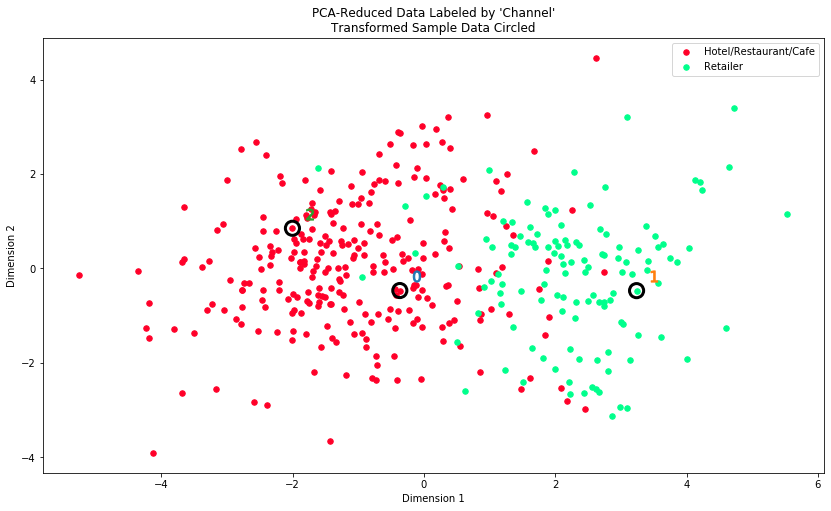

In [26]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, outliers, pca_samples)

If we asked questions like :
* How well does the clustering algorithm and number of clusters we've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would we consider these classifications as consistent with your previous definition of the customer segments?

We could think as follows:
- Actual data seems to match very strongly our predicted clusters. It shows that the GMM clustering was successfully able to setup the main links perfectly. 
- Actual distribution has a less well defined seperation between clusters, but it can be stated with considerable confidence that data points with a very positive 1st PC (4<) and 2nd PC (2<) are most certainly a Retailer/supermarkets . Data points with a very negative 1st PC (<-2) and 2nd PC (<-1) are resturants,cafes or hotels.
- Yes, they are almost exactly the guesses I made regarding their classification - Cluster 0 I thought to be Restaurants and Cluster 1 being Supermarkets with little variation due to thinking about lots of Fresh.